# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
test=pd.read_csv('archive/test.csv')
train=pd.read_csv('archive/train.csv')
#sample=pd.read_csv('archive/sample_submission.csv')

## Train dataset

In [3]:
train.head(20)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [4]:
print(train.shape)

(29451, 12)


In [5]:
print(train['POSTED_BY'].unique())
print(train['UNDER_CONSTRUCTION'].unique())
print(train['RERA'].unique())
print('=====================')
print(train['BHK_NO.'].unique())
print(train['BHK_OR_RK'].unique())
print(train['SQUARE_FT'].nunique())
print('=====================')
print(train['READY_TO_MOVE'].unique())
print(train['RESALE'].unique())
print(train['ADDRESS'].nunique())
print('=====================')
print(train['LONGITUDE'].nunique())
print(train['LATITUDE'].nunique())
print(train['TARGET(PRICE_IN_LACS)'].nunique())


['Owner' 'Dealer' 'Builder']
[0 1]
[0 1]
[ 2  3  1  4  5  6 12  8 20 10  7  9 13 17 15 11]
['BHK' 'RK']
19561
[1 0]
[1 0]
6899
4087
4078
1172


In [6]:
#Pretvaranje kategorickih obelezja u numericka
train['POSTED_BY'].loc[train['POSTED_BY']=='Owner']=0
train['POSTED_BY'].loc[train['POSTED_BY']=='Dealer']=0.5
train['POSTED_BY'].loc[train['POSTED_BY']=='Builder']=1

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11684\2297802486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['POSTED_BY'].loc[train['POSTED_BY']=='Owner']=0
C:\Users\Stefan\AppData\Local\Temp\ipykernel_11684\2297802486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['POSTED_BY'].loc[train['POSTED_BY']=='Dealer']=0.5
C:\Users\Stefan\AppData\Local\Temp\ipykernel_11684\2297802486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [7]:
train['BHK_OR_RK'].loc[train['BHK_OR_RK']=='BHK']=0
train['BHK_OR_RK'].loc[train['BHK_OR_RK']=='RK']=1

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11684\934704369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['BHK_OR_RK'].loc[train['BHK_OR_RK']=='BHK']=0
C:\Users\Stefan\AppData\Local\Temp\ipykernel_11684\934704369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['BHK_OR_RK'].loc[train['BHK_OR_RK']=='RK']=1


In [8]:
#ne treba nam adresa jer imamo koordinate
train=train.drop(['ADDRESS'],axis=1)

In [9]:
train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [10]:
train.head(20)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0
1,0.5,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0
3,0,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5
4,0.5,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5
5,0,0,0,3,0,1250.000000,1,1,10.033280,76.282571,42.0
6,0.5,0,0,3,0,1495.053957,1,1,26.916347,75.795600,66.5
7,0,0,1,3,0,1181.012946,1,1,30.740000,76.650000,52.0
8,0.5,0,1,2,0,1040.000000,1,1,13.054202,77.674002,41.6
9,0,0,1,2,0,879.120879,1,1,12.951610,80.140970,36.0


In [11]:
train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


## Test dataset

In [12]:
test.head(20)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
5,Owner,0,0,2,BHK,500.000000,1,1,"Elora Park,Vadodara",21.716412,73.004076
6,Dealer,0,0,1,BHK,724.835886,1,1,"Shirgaon,Maharashtra",19.032025,73.621535
7,Dealer,1,1,1,BHK,778.842862,0,1,"Anjurdive,Mumbai",18.966670,72.833330
8,Dealer,0,0,1,BHK,600.055819,1,1,"Rambaug,Maharashtra",19.243817,73.134692
9,Dealer,0,0,2,BHK,1323.591698,1,1,"Borivali (West),Lalitpur",19.236100,72.833800


In [13]:
print(test.shape)

(68720, 11)


In [14]:
print(test['POSTED_BY'].unique())
print(test['UNDER_CONSTRUCTION'].unique())
print(test['RERA'].unique())
print('=====================')
print(test['BHK_NO.'].unique())
print(test['BHK_OR_RK'].unique())
print(test['SQUARE_FT'].nunique())
print('=====================')
print(test['READY_TO_MOVE'].unique())
print(test['RESALE'].unique())
print(test['ADDRESS'].nunique())
print('=====================')
print(test['LONGITUDE'].nunique())
print(test['LATITUDE'].nunique())



['Owner' 'Dealer' 'Builder']
[0 1]
[0 1]
[ 1  2  3  4 10  5  6 18 20 12  7  9  8 16 13 11 31]
['BHK' 'RK']
37704
[1 0]
[1 0]
11048
5907
5914


In [15]:
#Pretvaranje kategorickih obelezja u numericka
test['POSTED_BY'].loc[test['POSTED_BY']=='Owner']=0
test['POSTED_BY'].loc[test['POSTED_BY']=='Dealer']=0.5
test['POSTED_BY'].loc[test['POSTED_BY']=='Builder']=1

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11684\1749810161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['POSTED_BY'].loc[test['POSTED_BY']=='Owner']=0
C:\Users\Stefan\AppData\Local\Temp\ipykernel_11684\1749810161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['POSTED_BY'].loc[test['POSTED_BY']=='Dealer']=0.5
C:\Users\Stefan\AppData\Local\Temp\ipykernel_11684\1749810161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [16]:
test['BHK_OR_RK'].loc[test['BHK_OR_RK']=='BHK']=0
test['BHK_OR_RK'].loc[test['BHK_OR_RK']=='RK']=1

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11684\3617392714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['BHK_OR_RK'].loc[test['BHK_OR_RK']=='BHK']=0
C:\Users\Stefan\AppData\Local\Temp\ipykernel_11684\3617392714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['BHK_OR_RK'].loc[test['BHK_OR_RK']=='RK']=1


In [17]:
#ne treba nam adresa jer imamo koordinate
test=test.drop(['ADDRESS'],axis=1)

In [18]:
test.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [19]:
test.head(20)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0,0,0,1,0,545.171340,1,1,21.262000,73.047700
1,0.5,1,1,2,0,800.000000,0,0,18.966114,73.148278
2,0.5,0,0,2,0,1257.096513,1,1,22.592200,88.484911
3,0.5,0,0,3,0,1400.329489,1,1,26.988300,75.584600
4,0,0,0,1,0,430.477830,1,1,22.700000,72.870000
5,0,0,0,2,0,500.000000,1,1,21.716412,73.004076
6,0.5,0,0,1,0,724.835886,1,1,19.032025,73.621535
7,0.5,1,1,1,0,778.842862,0,1,18.966670,72.833330
8,0.5,0,0,1,0,600.055819,1,1,19.243817,73.134692
9,0.5,0,0,2,0,1323.591698,1,1,19.236100,72.833800


In [20]:
test.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040


In [21]:
train.to_csv('archive/train_num.csv')
test.to_csv('archive/test_num.csv')



# Data visualization

In [22]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
test=pd.read_csv('archive/test_num.csv', index_col=0)
train=pd.read_csv('archive/train_num.csv', index_col=0)

## Train dataset

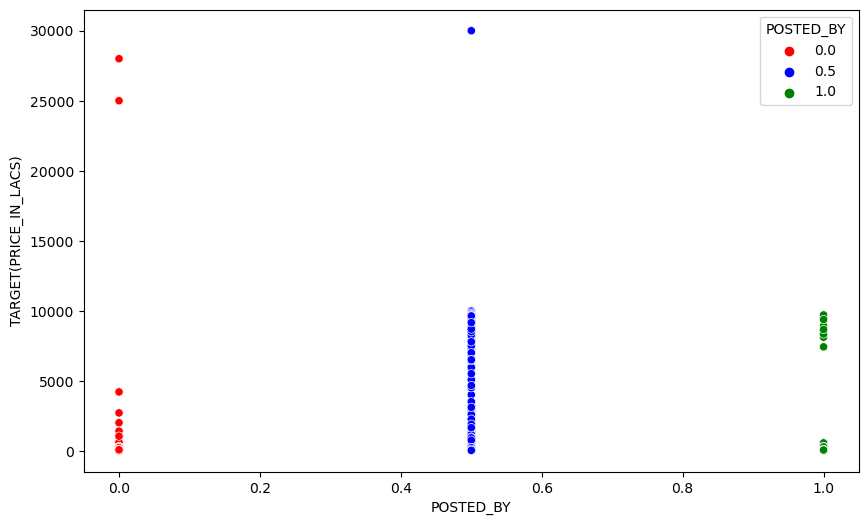

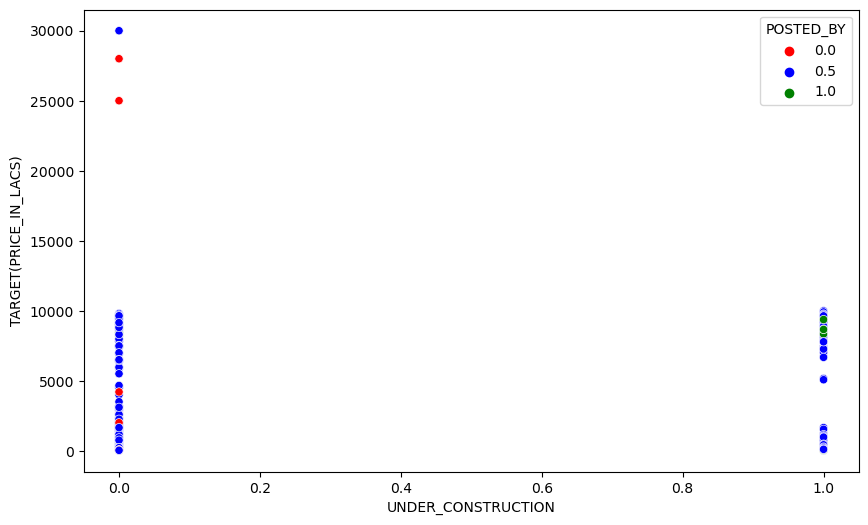

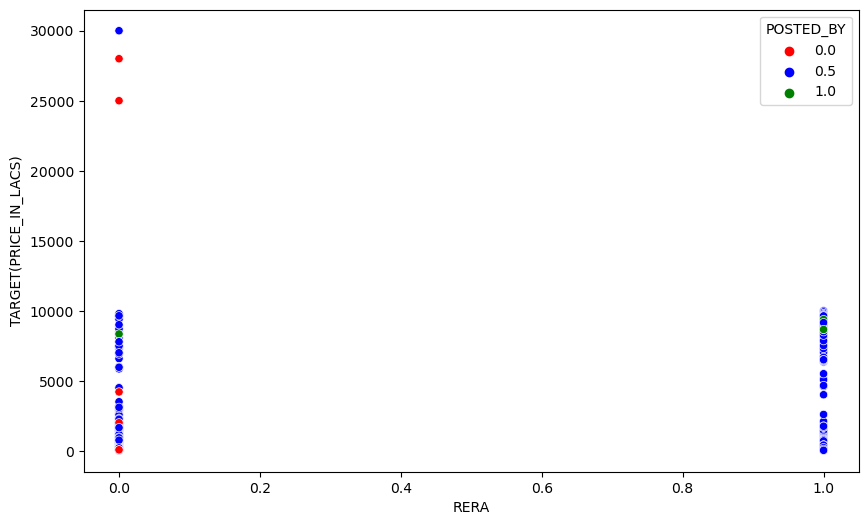

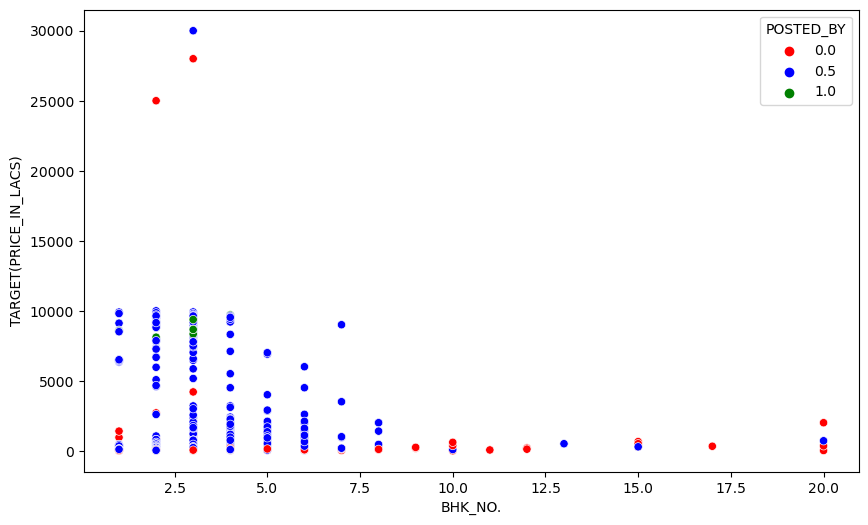

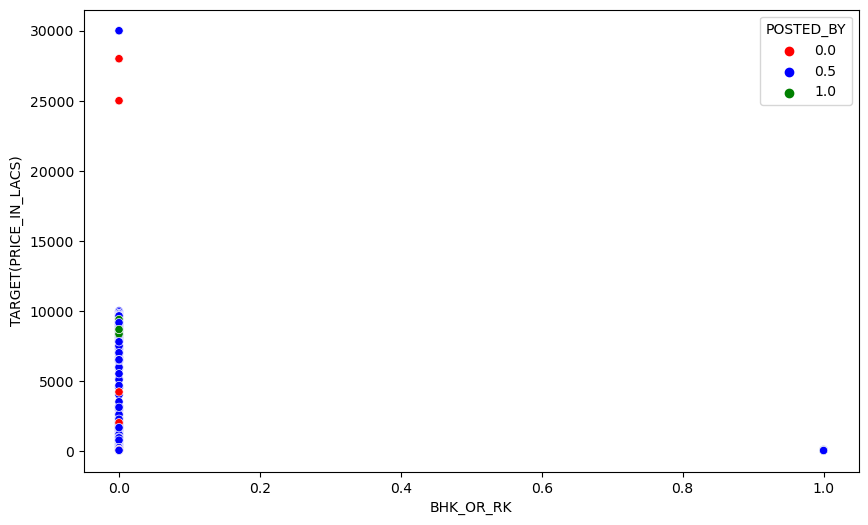

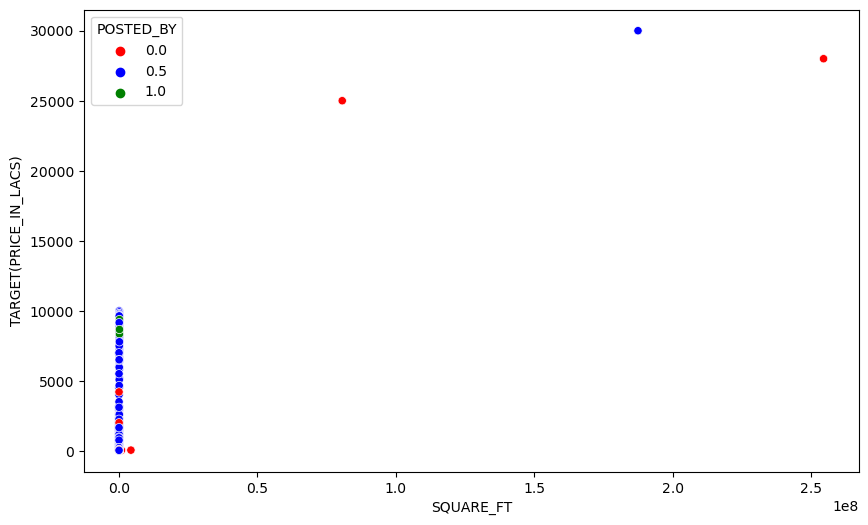

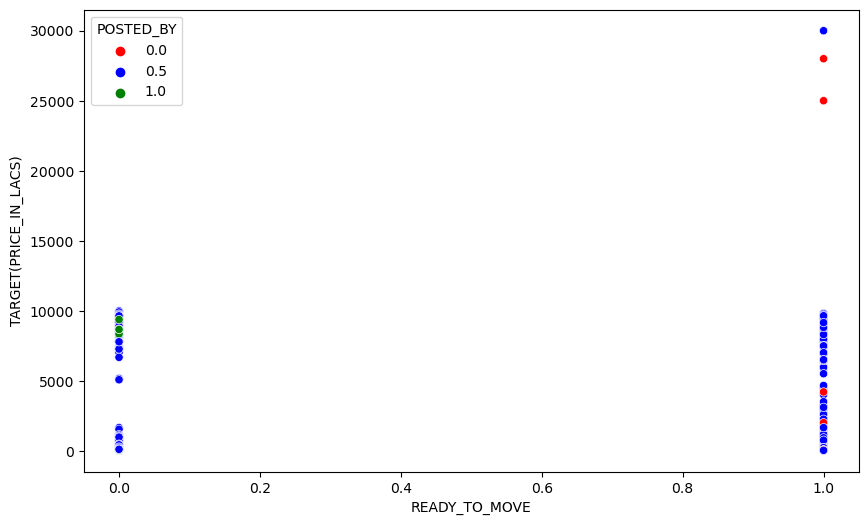

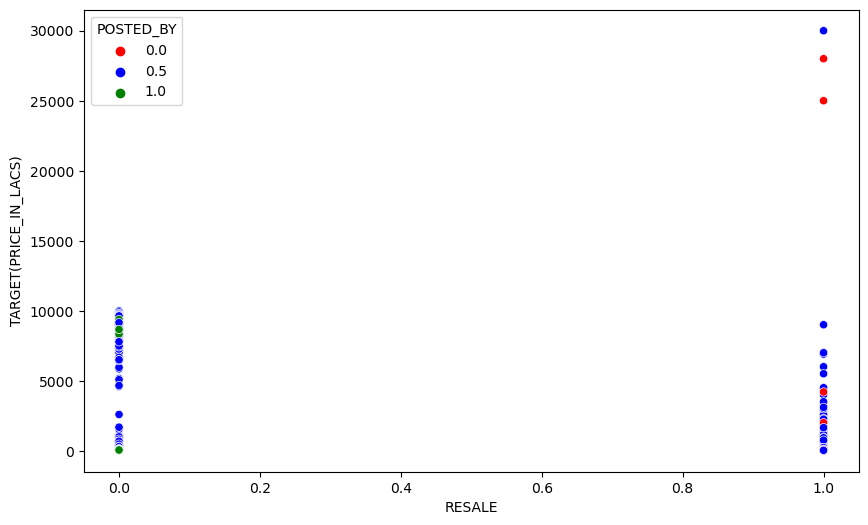

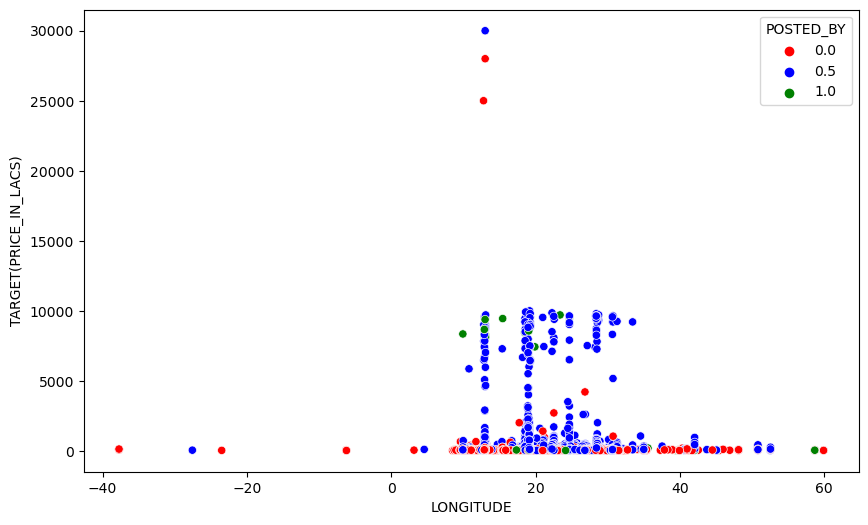

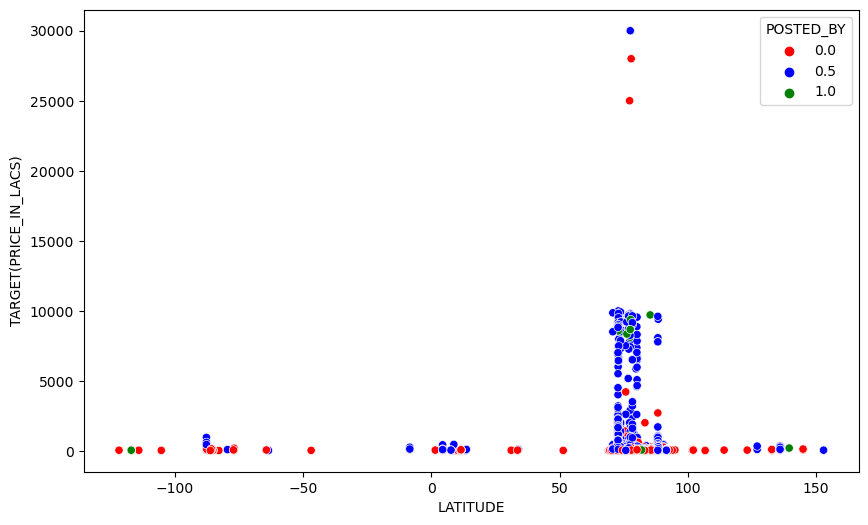

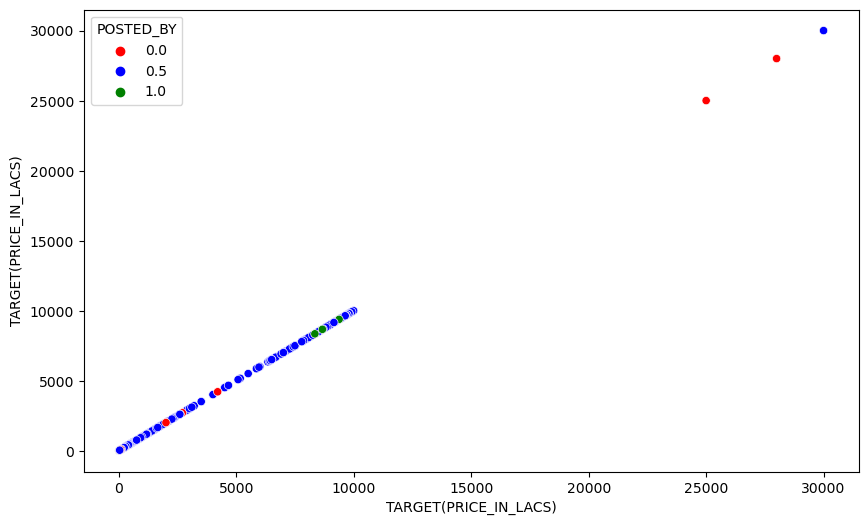

In [24]:
custom_palette = {0: 'red', 0.5: 'blue', 1: 'green'}
for i in range(train.shape[1]):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=train.iloc[:,i], y=train['TARGET(PRICE_IN_LACS)'], 
                    hue=train['POSTED_BY'], palette=custom_palette)

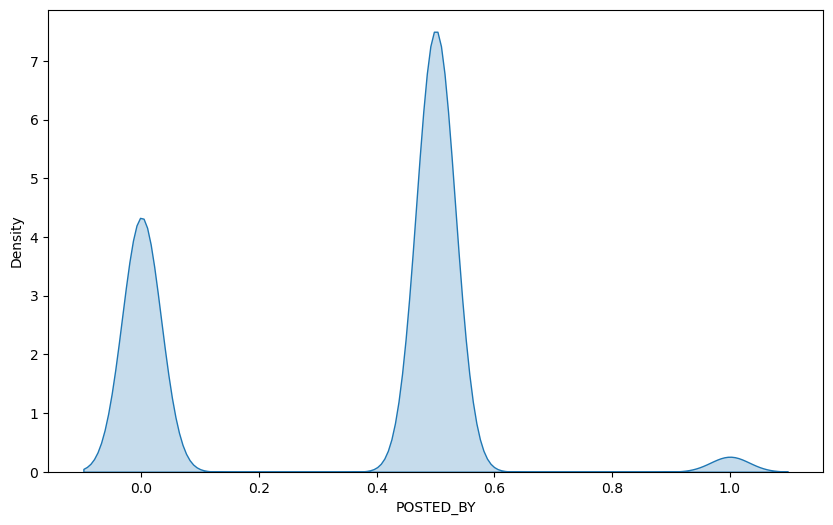

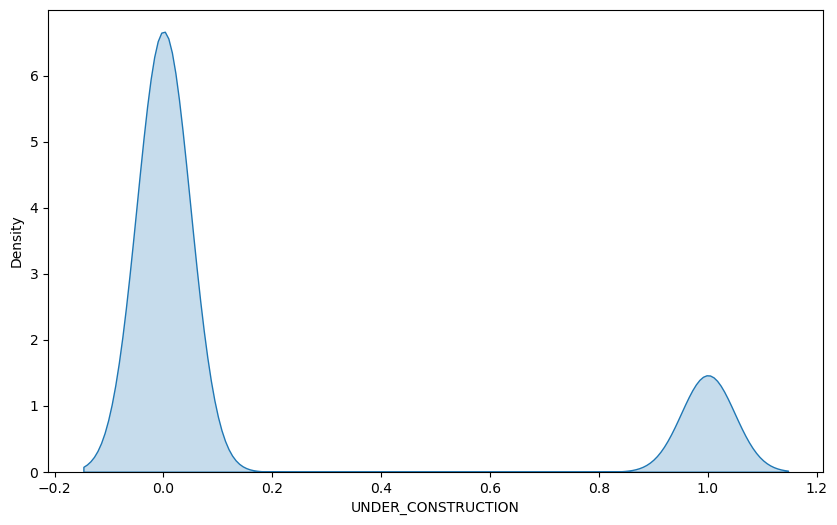

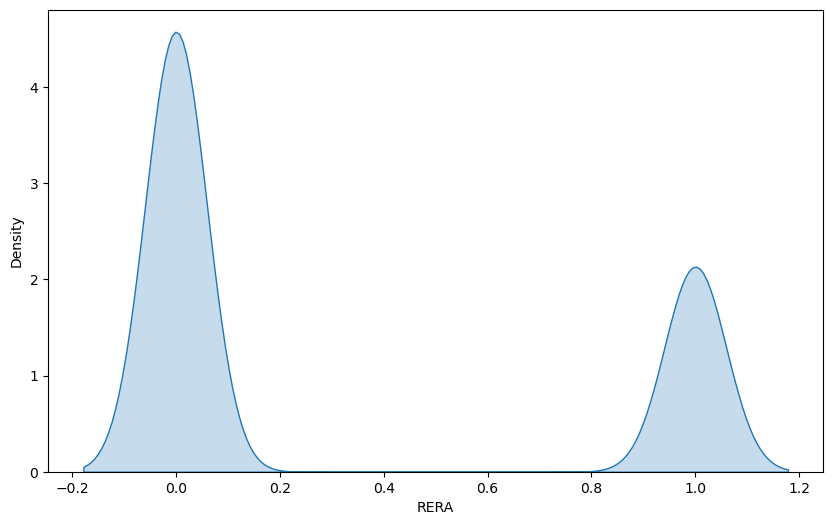

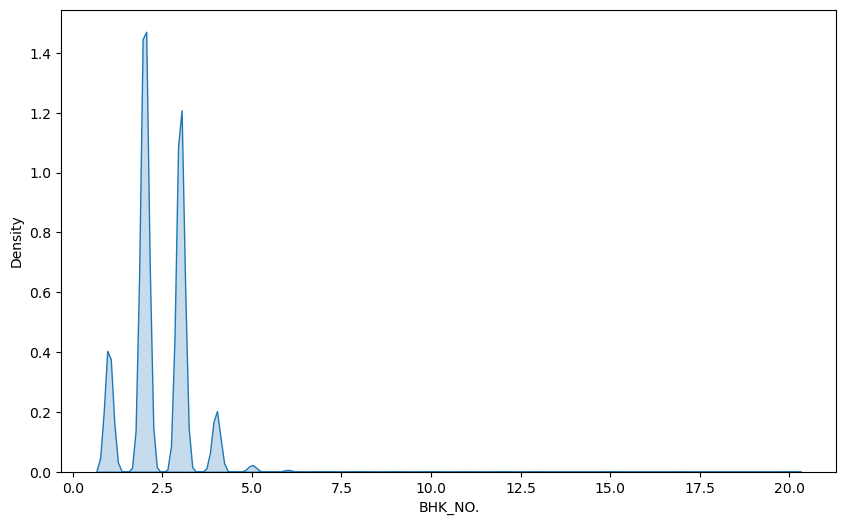

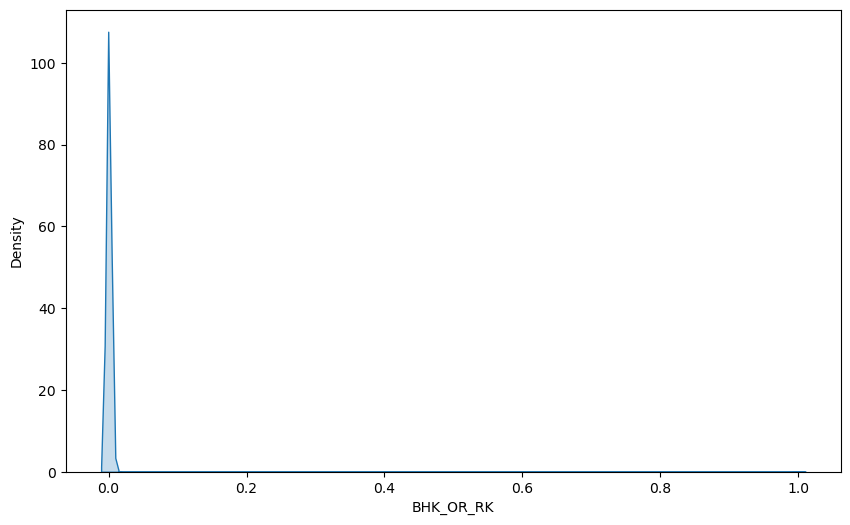

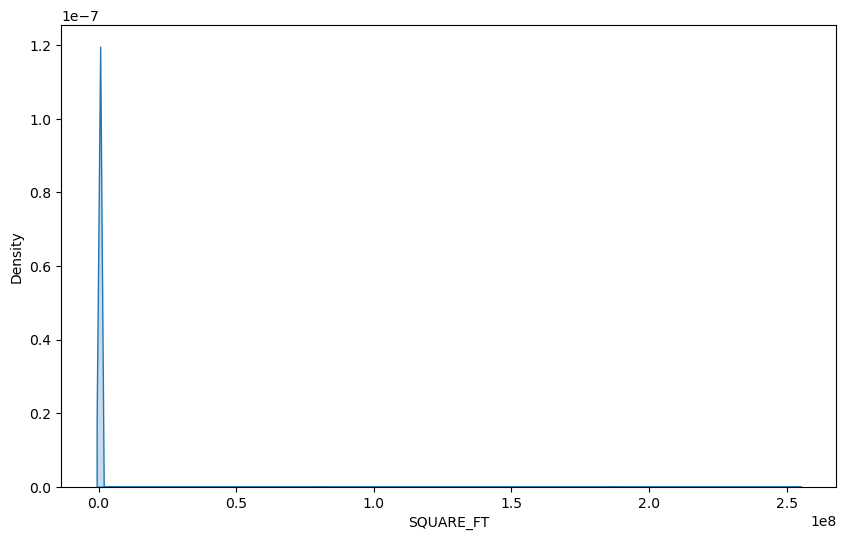

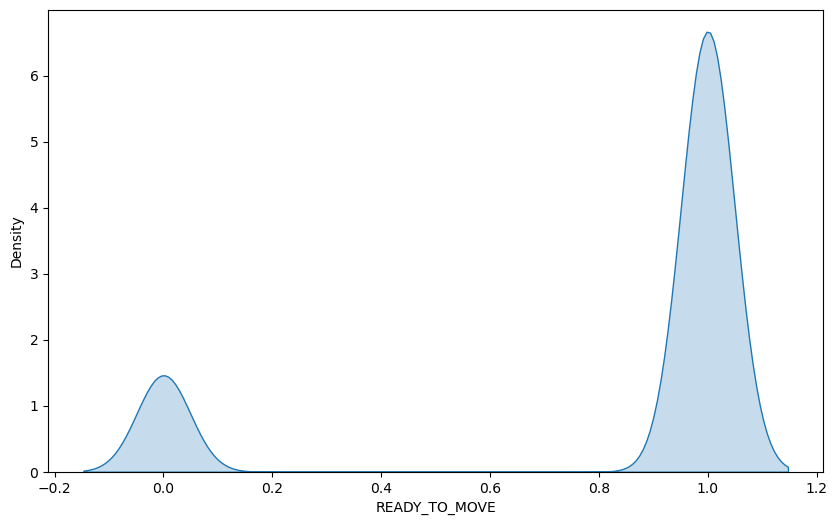

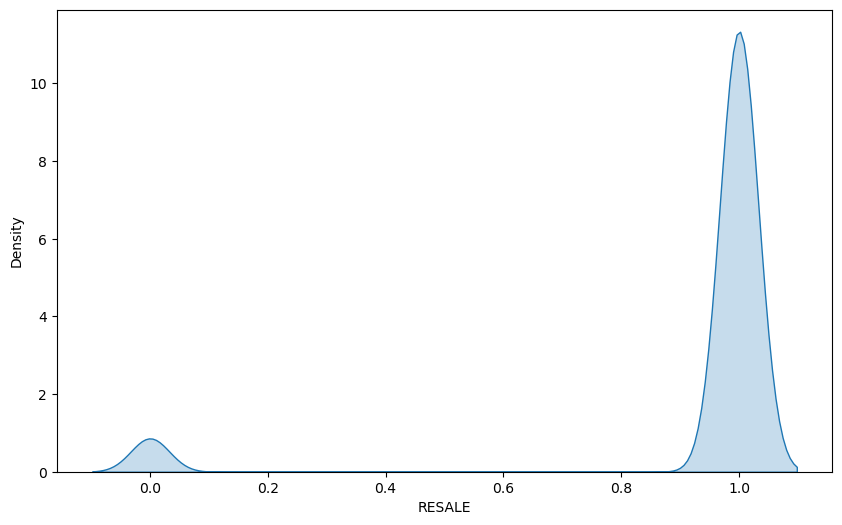

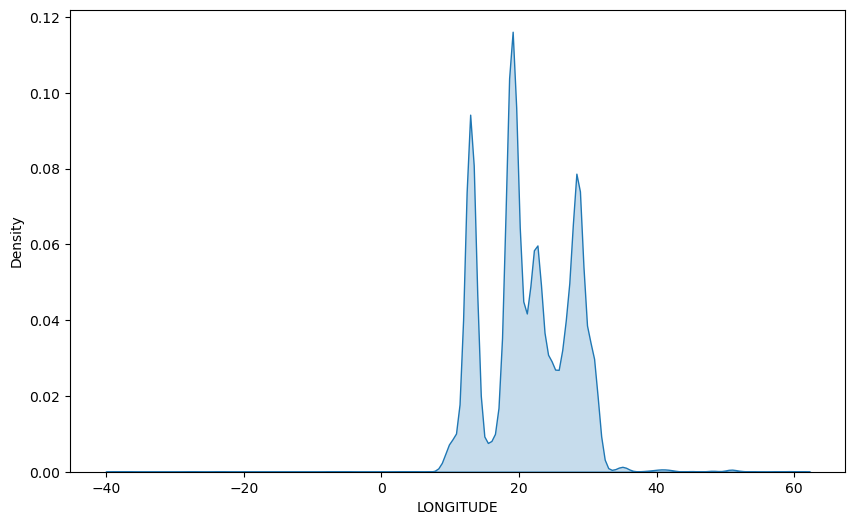

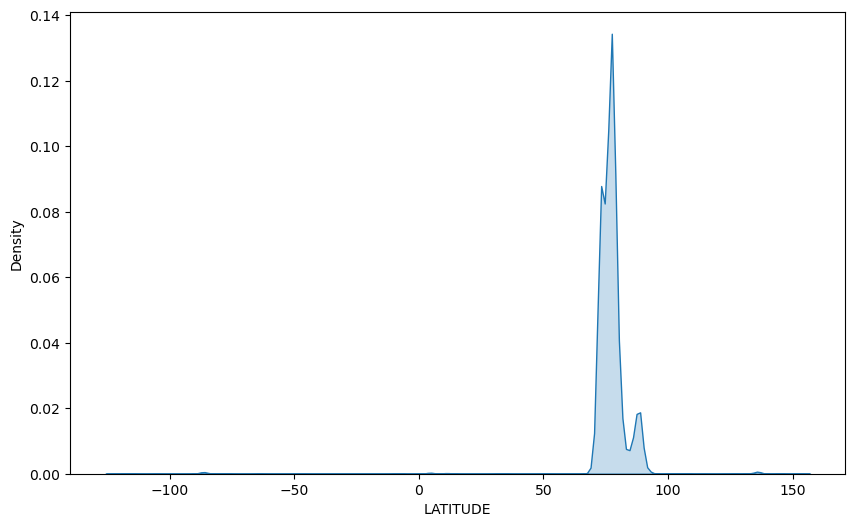

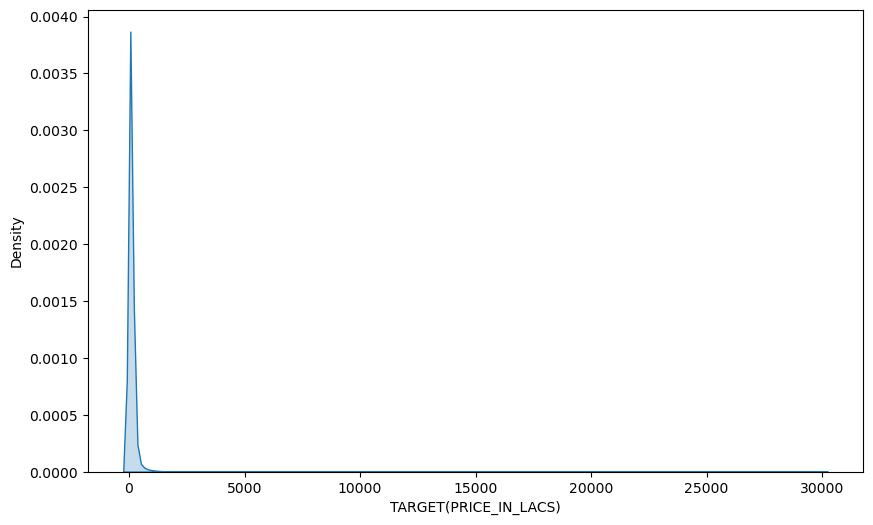

In [25]:
for i in range(train.shape[1]):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=train.iloc[:,i], shade=True)

## Test dataset

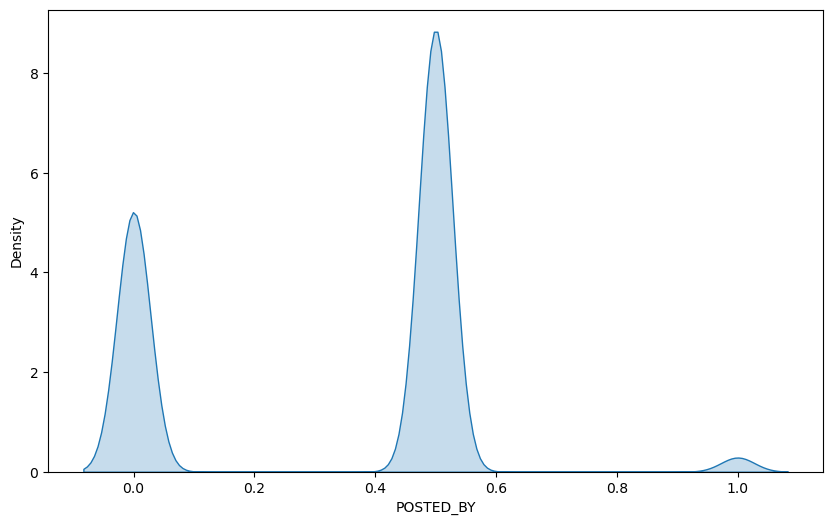

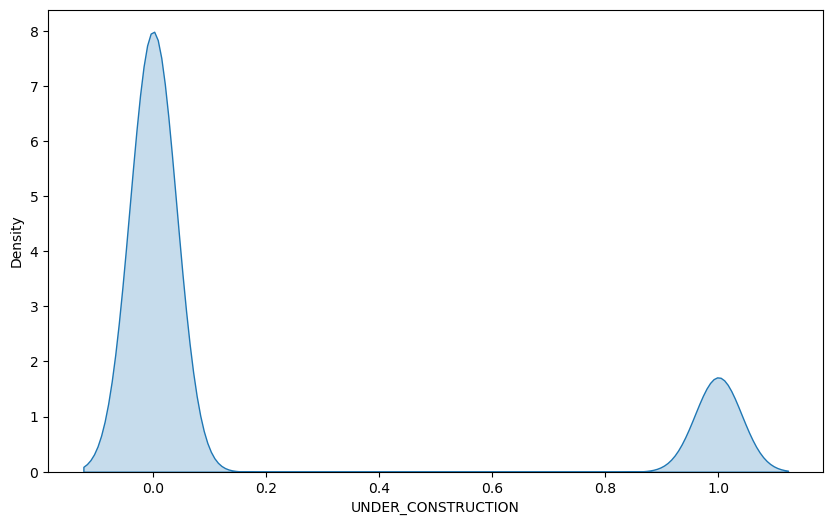

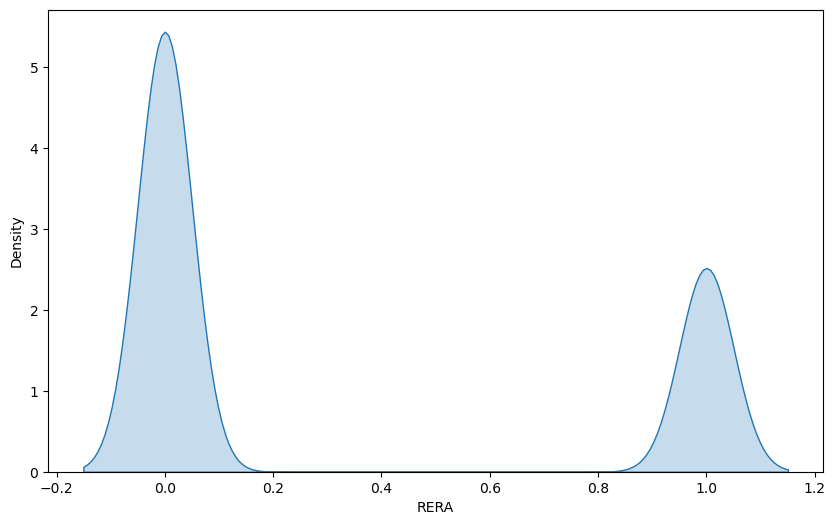

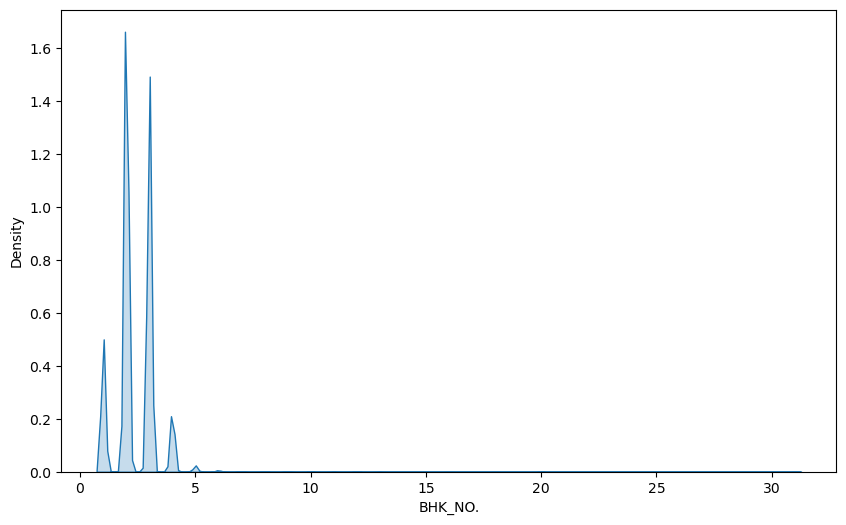

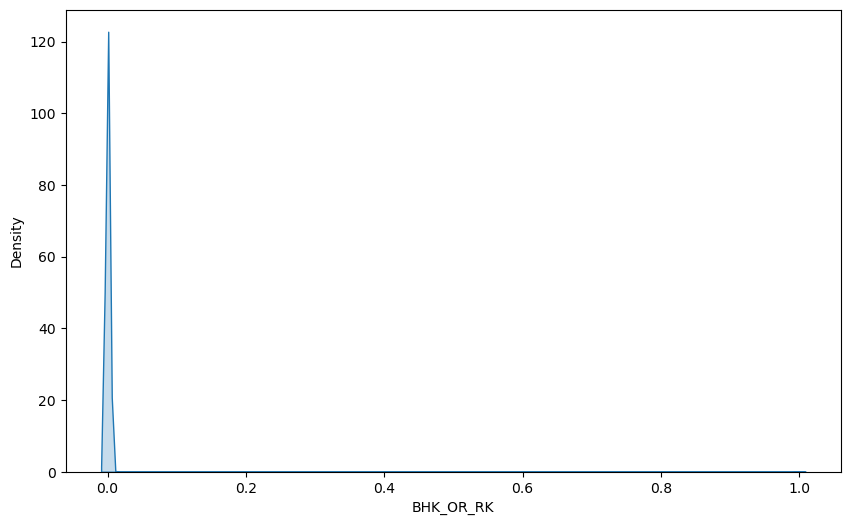

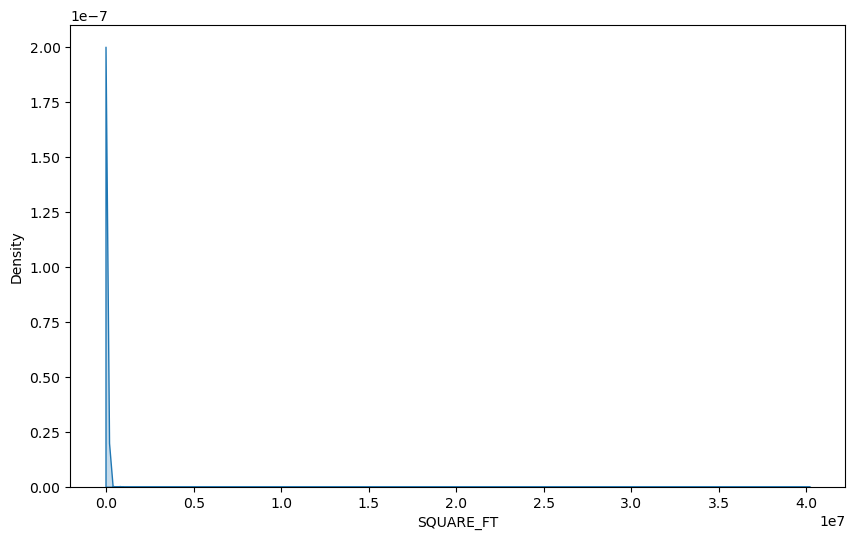

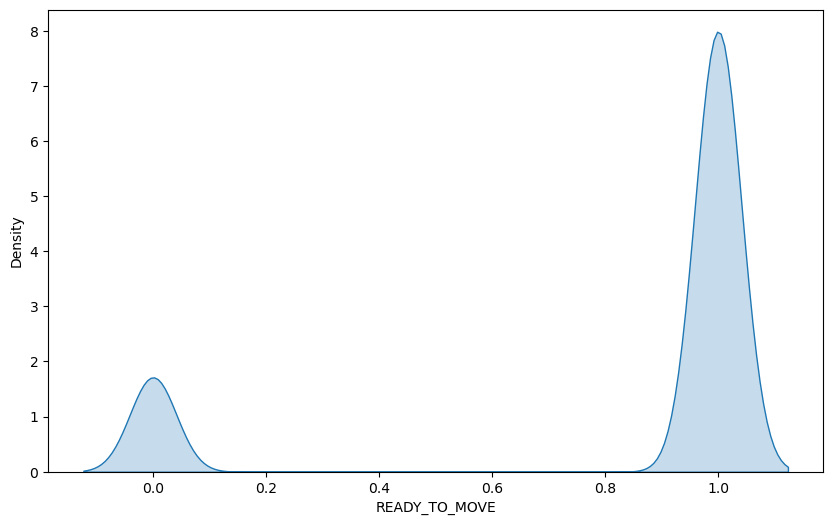

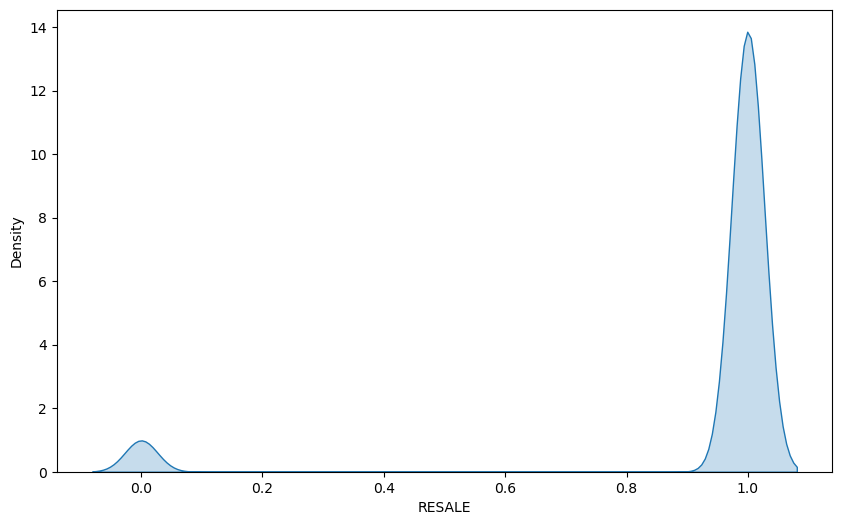

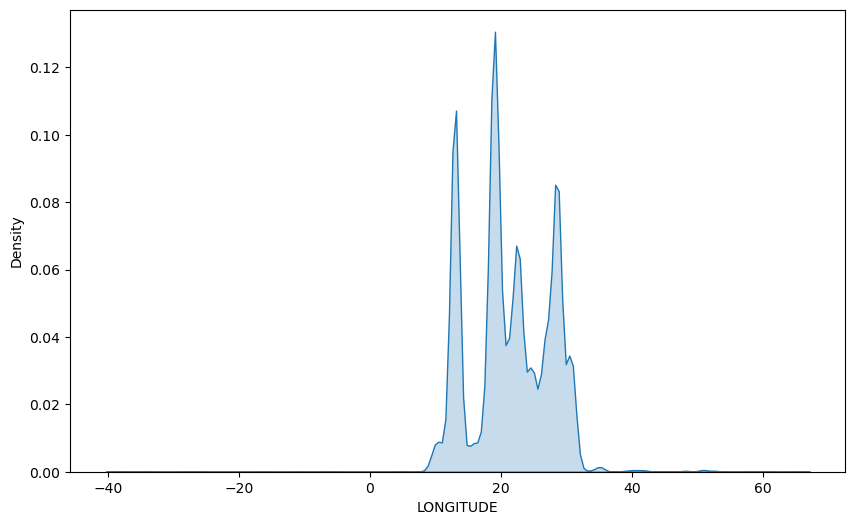

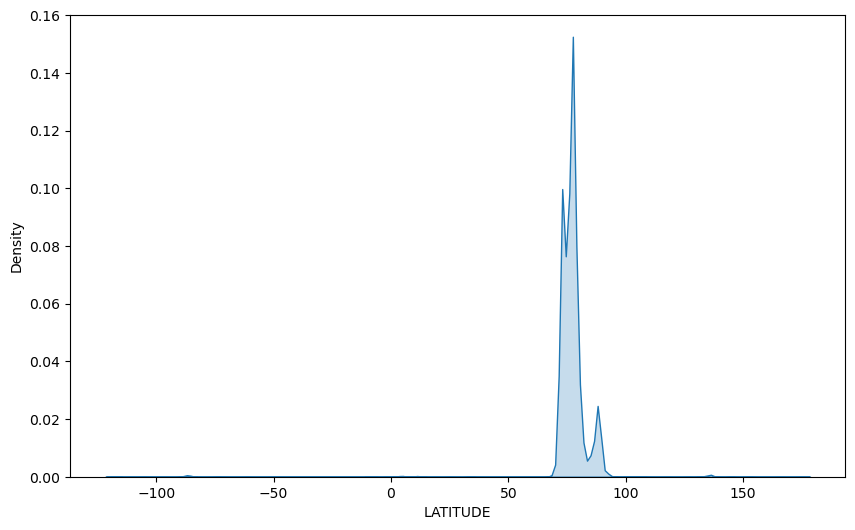

In [26]:
for i in range(test.shape[1]):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=test.iloc[:,i], shade=True)

# Outlier removal

## Train dataset

In [27]:
train=train.loc[train['TARGET(PRICE_IN_LACS)']<15000]
train=train.loc[train['SQUARE_FT']<2e5]
train=train.drop(['BHK_OR_RK'],axis=1) #Izbaceno jer ima premalo podataka za vrednost 1

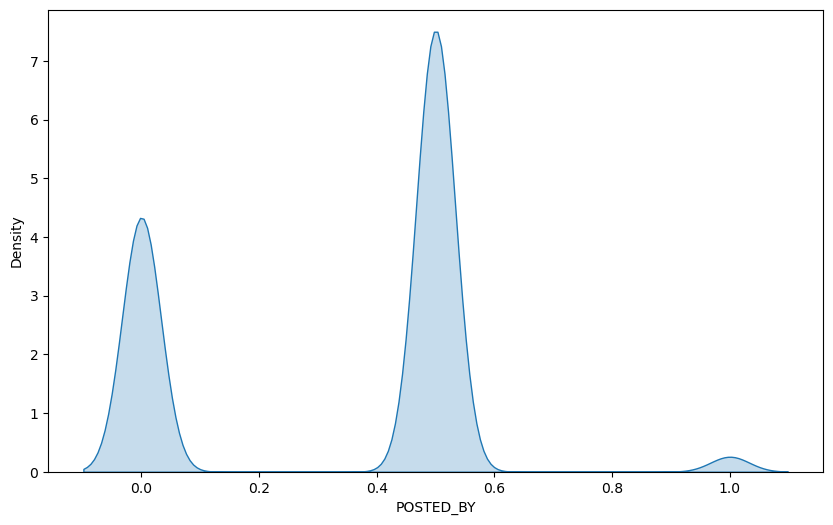

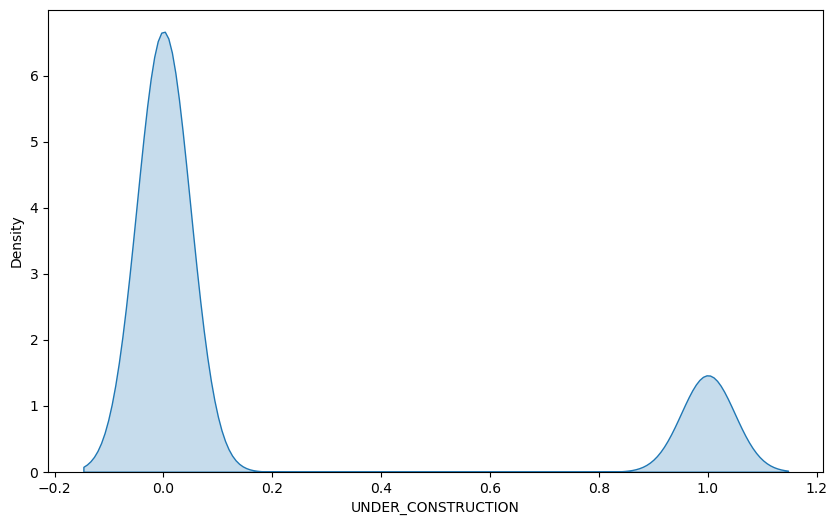

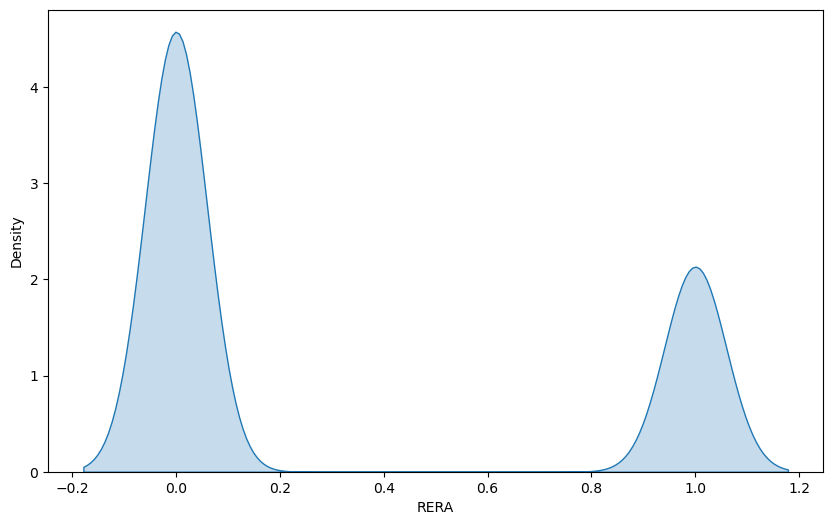

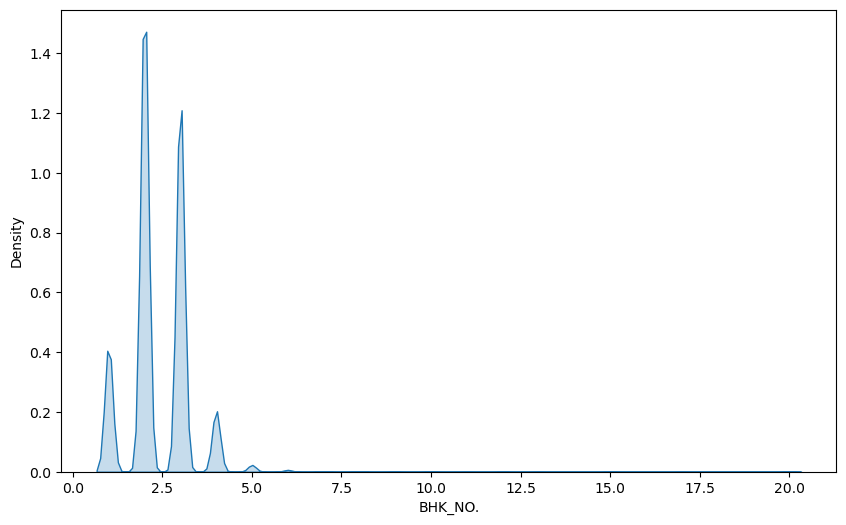

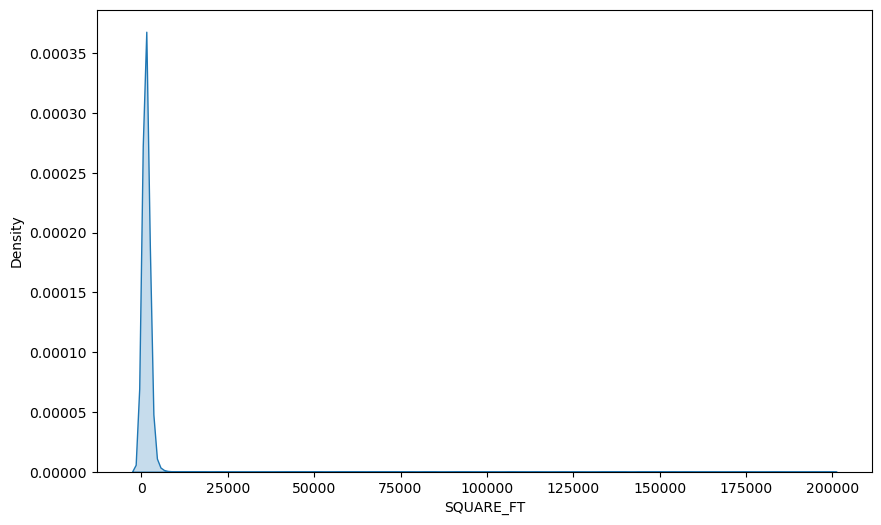

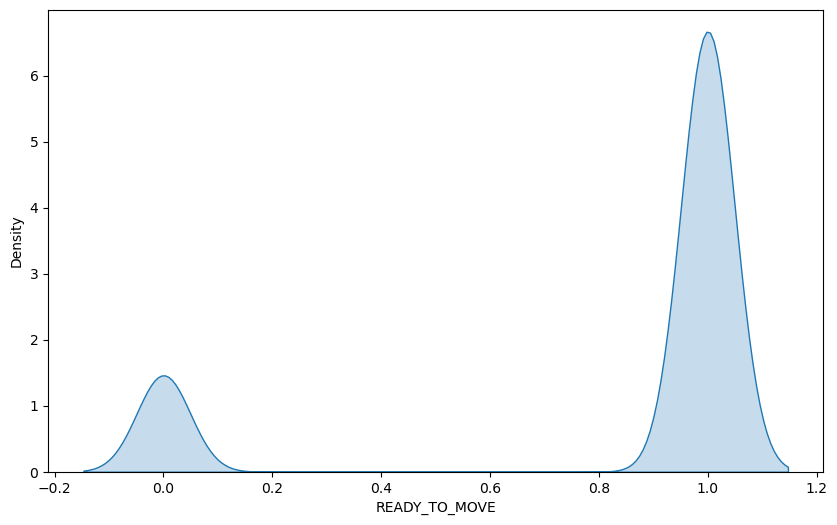

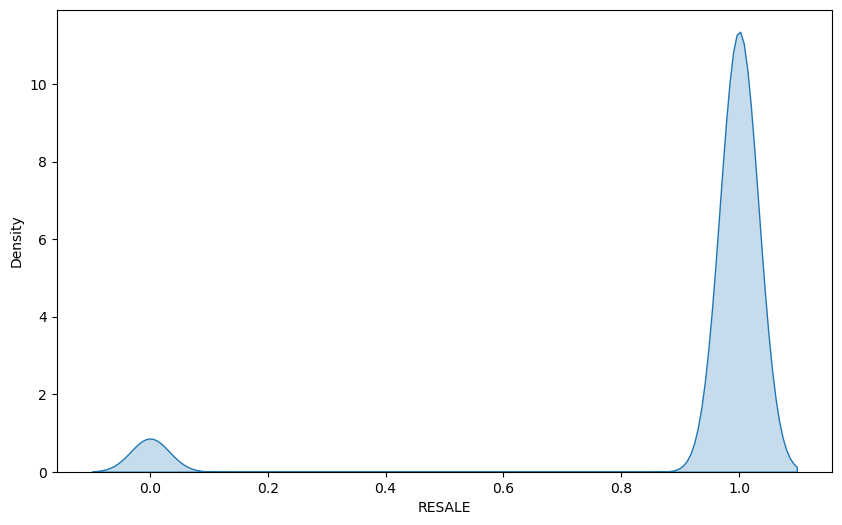

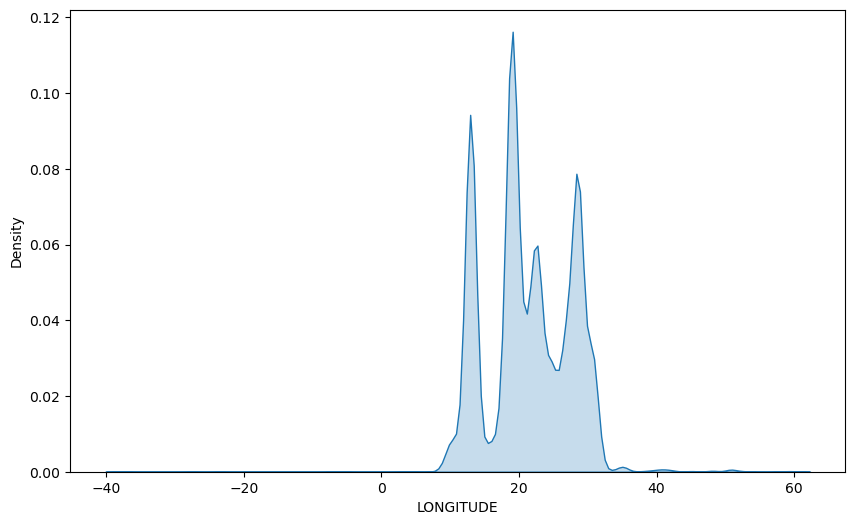

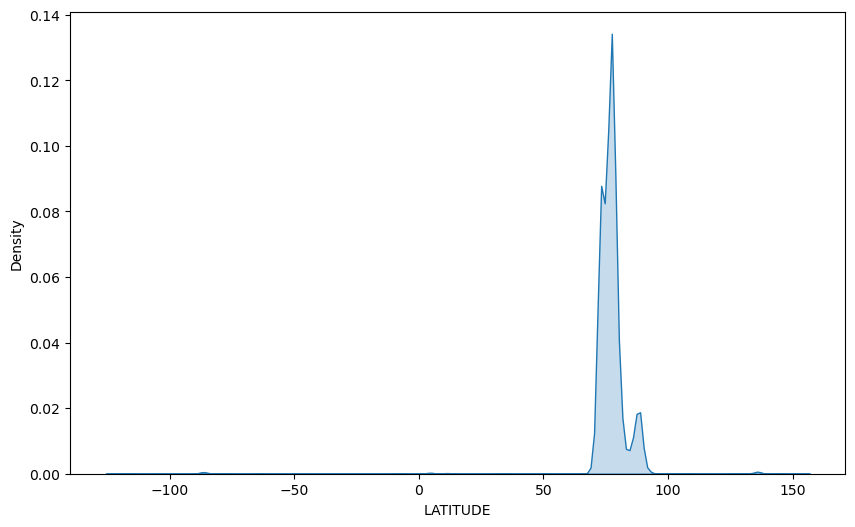

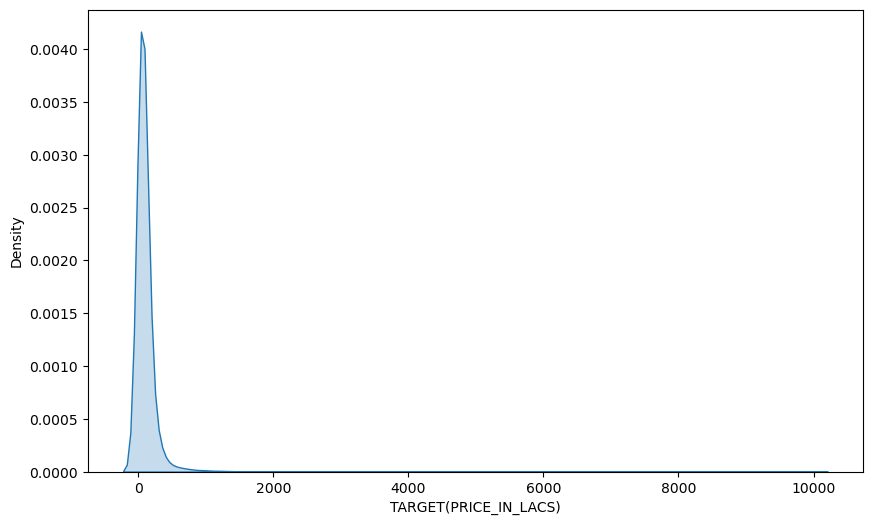

In [28]:
for i in range(train.shape[1]):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=train.iloc[:,i], shade=True)

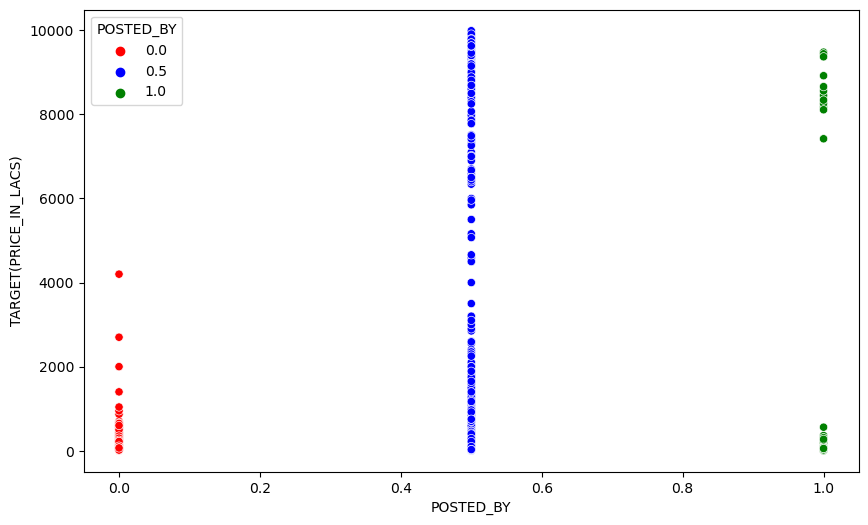

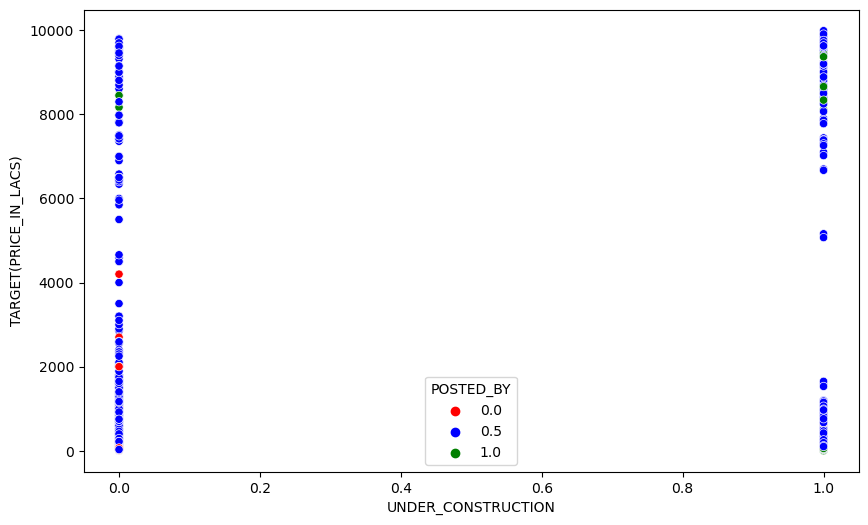

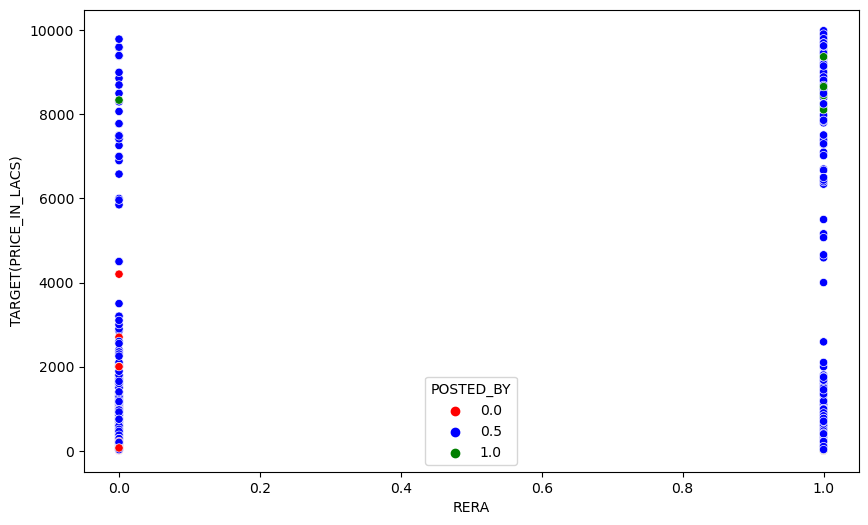

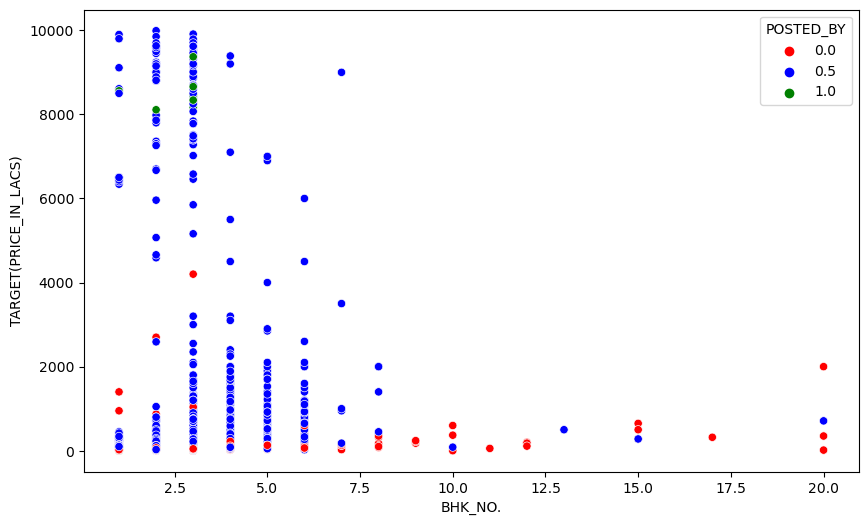

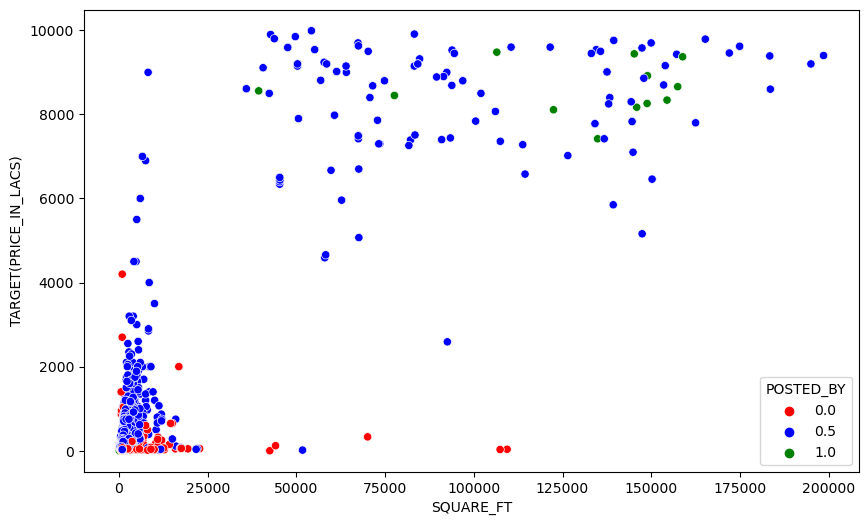

In [ ]:
custom_palette = {0: 'red', 0.5: 'blue', 1: 'green'}
for i in range(train.shape[1]):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=train.iloc[:,i], y=train['TARGET(PRICE_IN_LACS)'], 
                    hue=train['POSTED_BY'], palette=custom_palette)

In [ ]:
#STO JE MANJE SOBA IMA VISE KVADRATA????????????????
sns.scatterplot(x=train.loc[:,'BHK_NO.'], y=train['SQUARE_FT'])

## Test dataset

In [ ]:
test=test.loc[test['SQUARE_FT']<2e5]
test=test.loc[test['BHK_NO.']<21]
test=test.drop(['BHK_OR_RK'],axis=1) #Izbaceno jer ima premalo podataka za vrednost 1

In [ ]:
for i in range(test.shape[1]):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=test.iloc[:,i], shade=True)

In [ ]:
sns.scatterplot(x=test.loc[:,'BHK_NO.'], y=test['SQUARE_FT'])

In [ ]:
train.to_csv('archive/train_cleaned.csv')
test.to_csv('archive/test_cleaned.csv')

# Normalization

In [ ]:
train_norm=train
test_norm=test
long_min=-38.4
long_max=65.2
lat_min=-121.8
lat_max=175.3

train_norm['SQUARE_FT']=(train_norm['SQUARE_FT']-
                         train_norm['SQUARE_FT'].min())/(train_norm['SQUARE_FT'].max()-
                                                         train_norm['SQUARE_FT'].min())
train_norm['BHK_NO.']=(train_norm['BHK_NO.']-
                         train_norm['BHK_NO.'].min())/(train_norm['BHK_NO.'].max()-
                                                         train_norm['BHK_NO.'].min())
train_norm['LONGITUDE']=(train_norm['LONGITUDE']-
                         long_min)/(long_max-long_min)
train_norm['LATITUDE']=(train_norm['LATITUDE']-
                         lat_min)/(lat_max-lat_min)

test_norm['SQUARE_FT']=(test_norm['SQUARE_FT']-
                         test_norm['SQUARE_FT'].min())/(test_norm['SQUARE_FT'].max()-
                                                         test_norm['SQUARE_FT'].min())
test_norm['BHK_NO.']=(test_norm['BHK_NO.']-
                         test_norm['BHK_NO.'].min())/(test_norm['BHK_NO.'].max()-
                                                         test_norm['BHK_NO.'].min())
test_norm['LONGITUDE']=(test_norm['LONGITUDE']-
                         long_min)/(long_max-long_min)
test_norm['LATITUDE']=(test_norm['LATITUDE']-
                         lat_min)/(lat_max-lat_min)


In [ ]:
test_norm.describe()

In [ ]:
train_norm.describe()

In [ ]:
train_norm.to_csv('archive/train_norm.csv')
test_norm.to_csv('archive/test_norm.csv')